 Fetching Real-Time Chicago Traffic Data
 Real-time Traffic API Status: 200
 Real-time: 29 records

🚦 Fetching Traffic Congestion Data
 Congestion API Status: 200
 Congestion: 1257 records

 Exploring Real-Time Traffic Data
 Records: 29
  Regions: 29
  Latest Update: 2025-10-13 02:30:50.0

 Columns:
   region: 29 non-null
   _region_id: 29 non-null
   _west: 29 non-null
   _east: 29 non-null
   _south: 29 non-null
   _north: 29 non-null
   _description: 29 non-null
   current_speed: 29 non-null
   _last_updt: 29 non-null

 Current Speed Stats:
   Average: 11.1 mph
   Min: 0.0 mph
   Max: 35.5 mph

  Average Speed by Region:
   Ashburn: 0.0 mph
   Austin: 0.0 mph
   Beverly-Mt Greenwood-Morgan Park: 0.0 mph
   Dunning-Portage-Belmont Cragn: 0.0 mph
   Downtown Lakefront: 0.0 mph
   Irving Park-Avondale-North Ctr: 0.0 mph
   Hermosa-Logan Square: 0.0 mph
   Edge Water-Uptown: 0.0 mph
   Lawndale N/S: 0.0 mph
   Hyde Park-Kenwood-Woodlawn: 0.0 mph
   Riverdale-Hegewisch: 0.0 mph
   North 

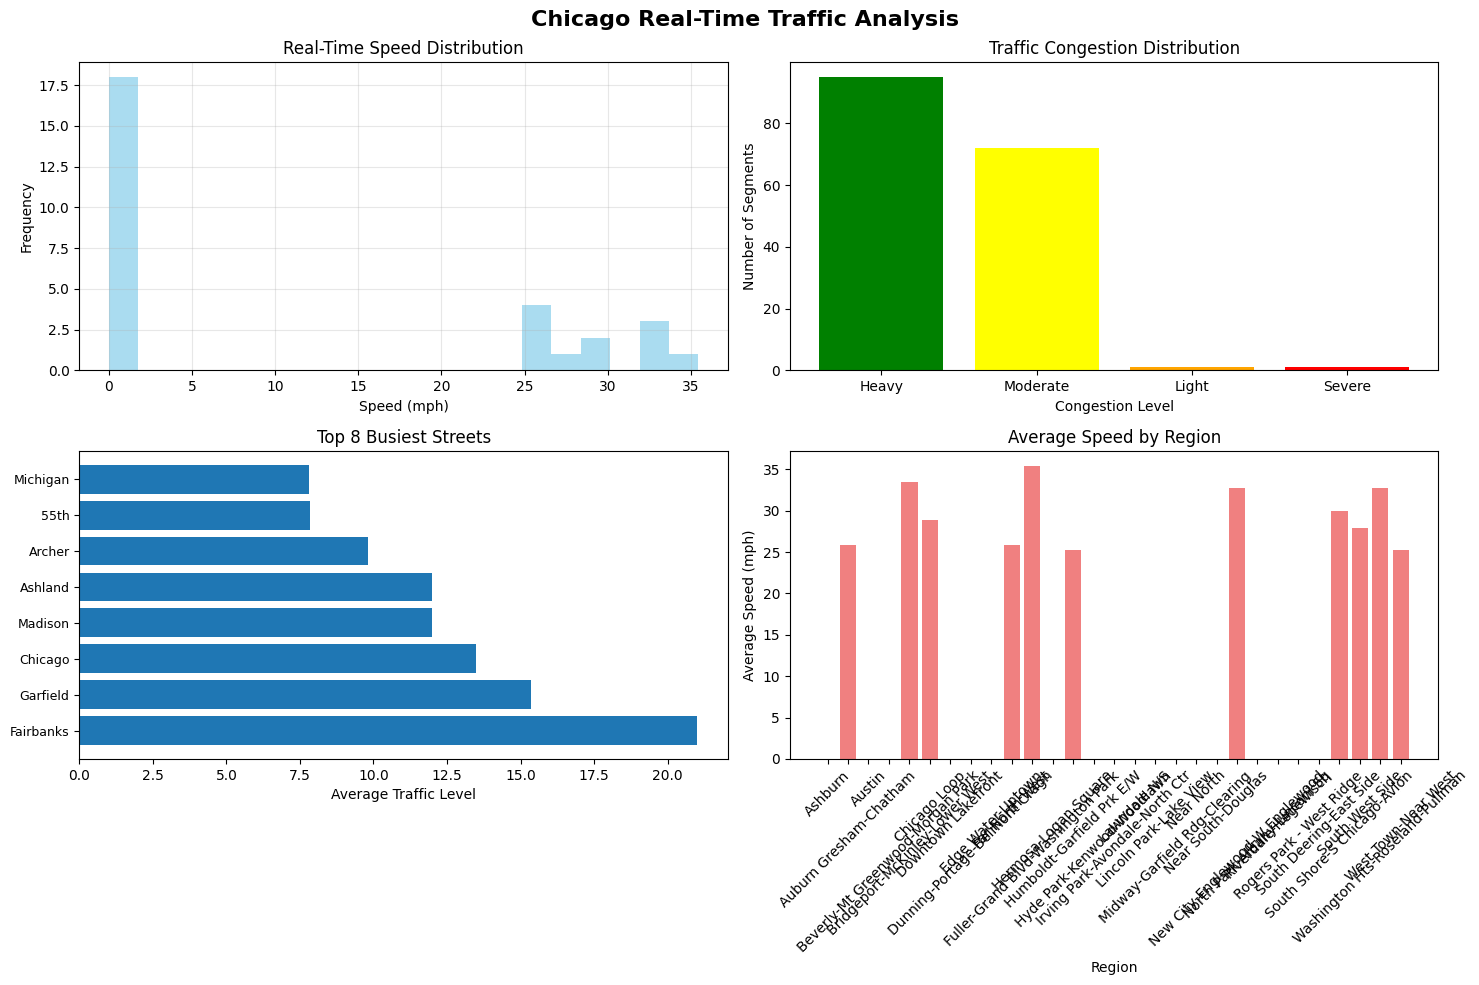


 Step 2 Complete! Ready for advanced analysis...

 Now we have:
    Real-time traffic speeds by region
    Congestion data for street segments
    Current, live data from Chicago


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

# Working real-time traffic endpoints
REALTIME_TRAFFIC_URL = "https://data.cityofchicago.org/resource/t2qc-9pjd.json"
CONGESTION_URL = "https://data.cityofchicago.org/resource/n4j6-wkkf.json"

def fetch_realtime_traffic():
    """Fetch real-time traffic data"""
    print(" Fetching Real-Time Chicago Traffic Data")
    print("=" * 50)
    
    try:
        # Get more records for better analysis
        params = {'$limit': 1000}
        response = requests.get(REALTIME_TRAFFIC_URL, params=params, timeout=15)
        
        print(f" Real-time Traffic API Status: {response.status_code}")
        
        if response.status_code == 200:
            data = response.json()
            df = pd.DataFrame(data)
            print(f" Real-time: {len(df)} records")
            return df
        else:
            print(f" Real-time API Error")
            return None
    except Exception as e:
        print(f" Real-time Error: {e}")
        return None

def fetch_congestion_data():
    """Fetch traffic congestion data"""
    print("\n🚦 Fetching Traffic Congestion Data")
    print("=" * 40)
    
    try:
        params = {'$limit': 2000}  # Get more segments
        response = requests.get(CONGESTION_URL, params=params, timeout=15)
        
        print(f" Congestion API Status: {response.status_code}")
        
        if response.status_code == 200:
            data = response.json()
            df = pd.DataFrame(data)
            print(f" Congestion: {len(df)} records")
            return df
        else:
            print(f" Congestion API Error")
            return None
    except Exception as e:
        print(f" Congestion Error: {e}")
        return None

def explore_realtime_data(realtime_df):
    """Explore the real-time traffic data"""
    print("\n Exploring Real-Time Traffic Data")
    print("=" * 45)
    
    if realtime_df is None or realtime_df.empty:
        print(" No real-time data available")
        return
    
    print(f" Records: {len(realtime_df)}")
    print(f"  Regions: {realtime_df['region'].nunique()}")
    print(f"  Latest Update: {realtime_df['_last_updt'].max()}")
    # Show data structure
    print("\n Columns:")
    for col in realtime_df.columns:
        non_null = realtime_df[col].notna().sum()
        print(f"   {col}: {non_null} non-null")
    
    # Convert data types
    realtime_df['current_speed'] = pd.to_numeric(realtime_df['current_speed'], errors='coerce')
    realtime_df['_last_updt'] = pd.to_datetime(realtime_df['_last_updt'], errors='coerce')
    
    # Basic analysis
    print(f"\n Current Speed Stats:")
    print(f"   Average: {realtime_df['current_speed'].mean():.1f} mph")
    print(f"   Min: {realtime_df['current_speed'].min():.1f} mph")
    print(f"   Max: {realtime_df['current_speed'].max():.1f} mph")
    
    # Region analysis
    region_speeds = realtime_df.groupby('region')['current_speed'].mean().sort_values()
    print(f"\n  Average Speed by Region:")
    for region, speed in region_speeds.items():
        print(f"   {region}: {speed:.1f} mph")
    
    return realtime_df

def explore_congestion_data(congestion_df):
    """Explore the congestion data"""
    print("\n Exploring Congestion Data")
    print("=" * 35)

    if congestion_df is None or congestion_df.empty:
        print(" No congestion data available")
        return
    
    print(f" Records: {len(congestion_df)}")
    print(f"  Street Segments: {congestion_df['segmentid'].nunique()}")
    
    # Show data structure
    print("\n Key Columns:")
    key_columns = ['segmentid', 'street', '_direction', '_fromst', '_tost', '_traffic', '_last_updt']
    for col in key_columns:
        if col in congestion_df.columns:
            non_null = congestion_df[col].notna().sum()
            print(f"   {col}: {non_null} non-null")
    
    # Convert data types
    congestion_df['_traffic'] = pd.to_numeric(congestion_df['_traffic'], errors='coerce')
    congestion_df['_last_updt'] = pd.to_datetime(congestion_df['_last_updt'], errors='coerce')
    
    # Traffic analysis
    print(f"\n Traffic Congestion Levels:")
    traffic_stats = congestion_df['_traffic'].describe()
    print(traffic_stats)
    
    # Categorize congestion
    congestion_df['congestion_level'] = pd.cut(
        congestion_df['_traffic'],
        bins=[-1, 10, 25, 40, 100],
        labels=['Light', 'Moderate', 'Heavy', 'Severe']
    )
    
    congestion_counts = congestion_df['congestion_level'].value_counts()
    print(f"\n🚦 Congestion Distribution:")
    print(congestion_counts)
    
    # Busiest streets
    street_traffic = congestion_df.groupby('street')['_traffic'].mean().nlargest(10)
    print(f"\n Top 10 Busiest Streets:")
    for street, traffic in street_traffic.items():
        print(f"   {street}: {traffic:.1f}")
    
    return congestion_df

def combine_datasets(realtime_df, congestion_df):
    """Combine both datasets for comprehensive analysis"""
    print("\n Combining Traffic Datasets")
    print("=" * 35)
    
    # For now, we'll work with them separately but plan integration
    print(" Both datasets loaded successfully")
    print(" We'll analyze them separately then look for correlations")
    
    return realtime_df, congestion_df

import os

def save_traffic_data(realtime_df, congestion_df):
    """Save both datasets for future analysis"""
    # Ensure the directory exists
    os.makedirs('../data/processed', exist_ok=True)
    
    if realtime_df is not None:
        realtime_df.to_csv('../data/processed/chicago_realtime_traffic.csv', index=False)
        print(f" Saved real-time data: {len(realtime_df)} records")
    
    if congestion_df is not None:
        congestion_df.to_csv('../data/processed/chicago_congestion.csv', index=False)
        print(f" Saved congestion data: {len(congestion_df)} records")

def create_quick_visualization(realtime_df, congestion_df):
    """Create quick visualizations of the traffic data"""
    print("\n Creating Quick Visualizations")
    print("=" * 40)

    # Ensure the output directory exists
    import os
    os.makedirs('../outputs/figures', exist_ok=True)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Chicago Real-Time Traffic Analysis', fontsize=16, fontweight='bold')
    
    # Plot 1: Real-time speed distribution
    if realtime_df is not None and 'current_speed' in realtime_df.columns:
        axes[0,0].hist(realtime_df['current_speed'].dropna(), bins=20, alpha=0.7, color='skyblue')
        axes[0,0].set_title('Real-Time Speed Distribution')
        axes[0,0].set_xlabel('Speed (mph)')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].grid(True, alpha=0.3)
    
    # Plot 2: Congestion levels
    if congestion_df is not None and 'congestion_level' in congestion_df.columns:
        congestion_counts = congestion_df['congestion_level'].value_counts()
        axes[0,1].bar(congestion_counts.index, congestion_counts.values, color=['green', 'yellow', 'orange', 'red'])
        axes[0,1].set_title('Traffic Congestion Distribution')
        axes[0,1].set_xlabel('Congestion Level')
        axes[0,1].set_ylabel('Number of Segments')
    
    # Plot 3: Top busy streets
    if congestion_df is not None and 'street' in congestion_df.columns:
        top_streets = congestion_df.groupby('street')['_traffic'].mean().nlargest(8)
        axes[1,0].barh(range(len(top_streets)), top_streets.values)
        axes[1,0].set_yticks(range(len(top_streets)))
        axes[1,0].set_yticklabels(top_streets.index, fontsize=9)
        axes[1,0].set_title('Top 8 Busiest Streets')
        axes[1,0].set_xlabel('Average Traffic Level')
    
    # Plot 4: Regional speeds
    if realtime_df is not None and 'region' in realtime_df.columns:
        region_speeds = realtime_df.groupby('region')['current_speed'].mean()
        axes[1,1].bar(region_speeds.index, region_speeds.values, color='lightcoral')
        axes[1,1].set_title('Average Speed by Region')
        axes[1,1].set_xlabel('Region')
        axes[1,1].set_ylabel('Average Speed (mph)')
        axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('../outputs/figures/realtime_traffic_overview.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    # Step 1: Fetch both datasets
    realtime_df = fetch_realtime_traffic()
    congestion_df = fetch_congestion_data()
    
    # Step 2: Explore both datasets
    if realtime_df is not None:
        realtime_df = explore_realtime_data(realtime_df)
    
    if congestion_df is not None:
        congestion_df = explore_congestion_data(congestion_df)
    
    # Step 3: Combine and save
    combine_datasets(realtime_df, congestion_df)
    save_traffic_data(realtime_df, congestion_df)
    
    # Step 4: Quick visualization
    create_quick_visualization(realtime_df, congestion_df)
    
    print("\n Step 2 Complete! Ready for advanced analysis...")
    print("\n Now we have:")
    print("    Real-time traffic speeds by region")
    print("    Congestion data for street segments")
    print("    Current, live data from Chicago")